# Modelos de Machine Learning para la Detección de Emociones a partir de la Voz.

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

## Cargar los datos

In [3]:
emociones=pd.read_csv("Emociones_Matriz")## Esta matriz se optine 
X=emociones.iloc[:,0:263]
y=emociones.iloc[:,-1]
y_etiquetadas = y.map(dict(zip(["Alegria", "Miedo", "Tristeza", "Enojo"], [0, 1, 2, 3])))

## Análisis Exploratorio De Los Datos

El análisis exploratorio de datos es una etapa fundamental en cualquier proyecto de modelado o análisis de datos. En el caso del modelo t-SNE (t-Distributed Stochastic Neighbor Embedding), el análisis exploratorio nos permite visualizar la estructura y distribución de los datos en un espacio de menor dimensión.

El t-SNE es una técnica de reducción de dimensionalidad no lineal que mapea los datos de alta dimensión en un espacio de menor dimensión, preservando las relaciones entre los puntos originales. Al aplicar el t-SNE a nuestro conjunto de datos, podemos obtener una representación visual que nos ayuda a identificar patrones, agrupaciones y posibles relaciones entre las muestra

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
X_estandarizado=StandardScaler().fit(X).transform(X)
tsne=TSNE(n_components=3)
X_tsne=tsne.fit_transform(X_estandarizado)

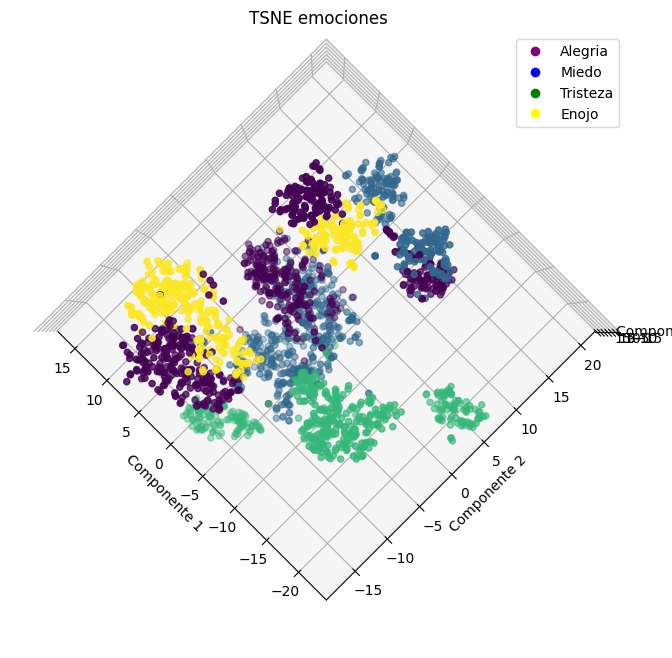

In [5]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c=y_etiquetadas, cmap='viridis')
ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')
ax.set_zlabel('Componente 3')
plt.title('TSNE emociones')

# Añadir interacción básica para rotar la visualización
ax.view_init(elev=270, azim=45)

# Crear leyenda con etiquetas de colores
etiquetas = ["Alegria", "Miedo", "Tristeza", "Enojo"]
colores = ["purple", "blue", "green", "yellow"]
etiquetas_colores = [plt.Line2D([0], [0], marker='o', color='w', label=etiqueta, markerfacecolor=color, markersize=8) for etiqueta, color in zip(etiquetas, colores)]
plt.legend(handles=etiquetas_colores)
plt.show()

## Clasificando las Emociones.
El análisis exploratorio de los datos reveló que las emociones presentan una estructura claramente agrupada, lo cual indica la existencia de patrones distintivos en la distribución de los datos. Con el objetivo de aprovechar esta información, se utilizarán los datos estandarizados para garantizar una comparación equitativa entre las características. Posteriormente, se seleccionarán tres modelos para abordar la clasificación de emociones: Support Vector Machine (SVM), K-Nearest Neighbors (KNN) y Neural Network (NN).

El modelo SVM será utilizado debido a su capacidad para utilizar kernels, como el kernel gaussiano, que permite clasificar relaciones no lineales entre las variables. Por otro lado, el modelo KNN se selecciona por su simplicidad y funcionalidad en la clasificación, aprovechando la estructura de vecindad entre las instancias. Por último, la Red Neuronal se considera por su capacidad de aprender patrones complejos y su flexibilidad en la clasificación.

In [6]:
from sklearn.model_selection import train_test_split
X_train_s,X_test_s,y_train_s,y_test_s=train_test_split(X_estandarizado,y,random_state=0)

### Support Vector Machine (SVM)
La elección adecuada del parámetro gamma en SVM es crucial para obtener un modelo bien ajustado. Gamma controla la flexibilidad de los límites de decisión. Valores más altos de gamma conducen a límites más ajustados y complejos, mientras que valores más bajos resultan en límites más suaves y generalizados. Estudiar gamma a través de gráficos nos ayuda a comprender su impacto y seleccionar el valor óptimo para maximizar el rendimiento del modelo.

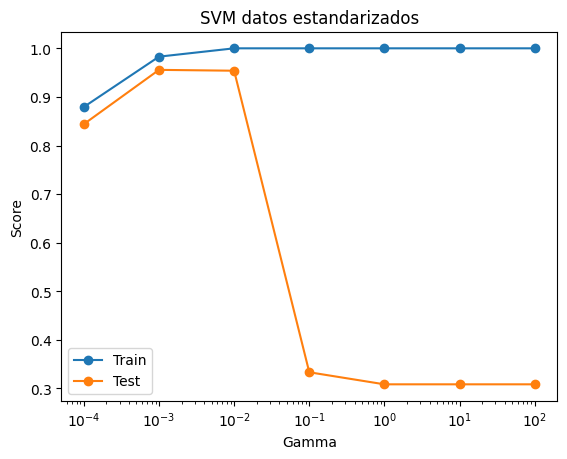

In [7]:
from sklearn.svm import SVC
gammas = [0.0001, 0.001,0.01, 0.1, 1, 10, 100]
score_train = []
score_test = []
for g in gammas:
    svm = SVC(kernel="rbf", gamma=g, decision_function_shape="ovr")
    svm.fit(X_train_s, y_train_s)
    score_train.append(svm.score(X_train_s, y_train_s))
    score_test.append(svm.score(X_test_s, y_test_s))
plt.semilogx(gammas, score_train, label='Train', marker='o')
plt.semilogx(gammas, score_test, label='Test', marker='o')
plt.xlabel('Gamma')
plt.ylabel('Score')
plt.title('SVM')
plt.legend()
plt.show()

Se observa una disminución en el rendimiento a medida que gamma se vuelve más grande, lo cual indica la presencia de sobreajuste (overfitting). Basándonos en esta observación, es recomendable seleccionar un valor de gamma más bajo, en este caso, $\gamma=0.001$. Este valor permite un equilibrio entre un modelo flexible y generalizado, lo que ayudará a obtener un rendimiento óptimo en datos no vistos

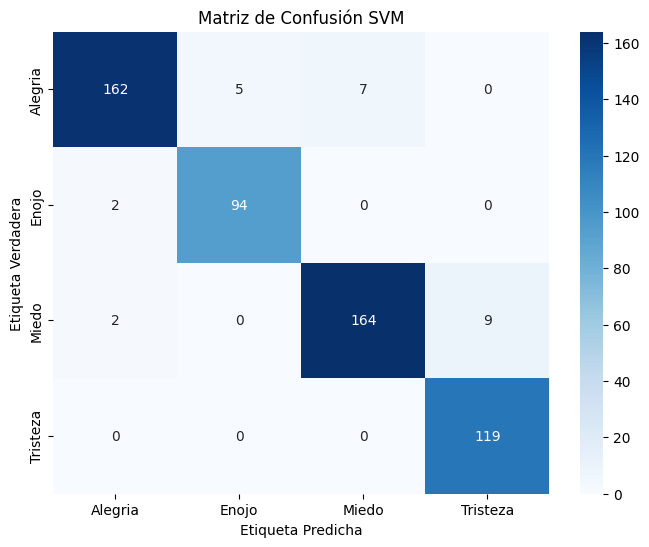

Reporte del modelo SVM


,Alegria,Enojo,Miedo,Tristeza,accuracy,macro avg,weighted avg
precision,0.975904,0.949495,0.959064,0.929688,0.955674,0.953538,0.956432
recall,0.931034,0.979167,0.937143,1.000000,0.955674,0.961836,0.955674
f1-score,0.952941,0.964103,0.947977,0.963563,0.955674,0.957146,0.955542
support,174.000000,96.000000,175.000000,119.000000,0.955674,564.000000,564.000000


In [31]:
svc = SVC(kernel="rbf", gamma=0.001, decision_function_shape="ovr").fit(X_train_s, y_train_s)
y_pred = svc.predict(X_test_s)
labels = np.unique(y_test_s)
cm = confusion_matrix(y_test_s, y_pred, labels=labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Matriz de Confusión SVM")
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Verdadera")
plt.show()
print("Reporte del modelo SVM")
df_report = pd.DataFrame.from_dict(classification_report(y_test_s, y_pred, output_dict=True))
df_report

Según el reporte del modelo SVM, podemos concluir lo siguiente:

1)El modelo muestra un alto rendimiento en general, con una precisión promedio ponderada de 0.956432 y un recall promedio ponderado de 0.955674. Esto indica que el modelo tiene la capacidad de clasificar correctamente la mayoría de las instancias en el conjunto de datos.

2)El modelo presenta un alto rendimiento en la detección del enojo, con una precisión de 0.949495 y un recall de 0.979167. Esto indica que el modelo es capaz de identificar correctamente la mayoría de las instancias de enojo.

3)El modelo muestra un buen rendimiento en la detección de alegría y miedo, con una precisión de 0.975904 y 0.959064 respectivamente. Sin embargo, muestra un rendimiento perfecto en la detección de tristeza, con una precisión y recall de 1.000000. Esto indica que el modelo es altamente preciso en la identificación de instancias de tristeza.

4)El modelo muestra un alto rendimiento en términos de precisión, recall y puntuación F1 para las diferentes clases emocionales, lo que indica su capacidad para clasificar correctamente las instancias en cada una de estas categorías.

En general, el modelo SVM muestra un rendimiento sólido en la clasificación de emociones, con una alta precisión y recall en la mayoría de las clases.

### K-Nearest Neighbors (KNN)
El modelo de KNN (vecinos más cercanos) es un algoritmo popular para clasificación y regresión en aprendizaje automático. Una gráfica de score en función del número de vecinos nos permite analizar cómo varía el rendimiento del modelo a medida que se ajusta el número de vecinos considerados en la clasificación. Esta visualización es importante para seleccionar el número óptimo de vecinos, ya que influye en el equilibrio entre el sesgo y la varianza del modelo, y puede afectar su capacidad de generalización.

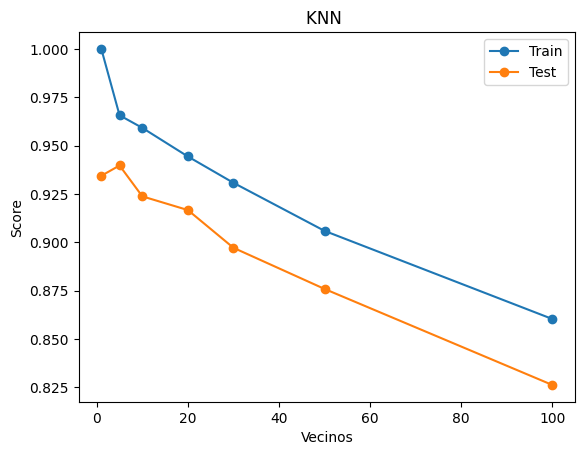

In [10]:
from sklearn.neighbors import KNeighborsClassifier
vecinos=[1,5,10,20,30,50,100]
score_train = []
score_test = []
for k in vecinos:
    knn=KNeighborsClassifier(n_neighbors=k).fit(X_train_s, y_train_s)
    score_train.append(knn.score(X_train_s, y_train_s))
    score_test.append(knn.score(X_test_s, y_test_s))
plt.plot(vecinos, score_train, label='Train', marker='o')
plt.plot(vecinos, score_test, label='Test', marker='o')
plt.xlabel('Vecinos')
plt.ylabel('Score')
plt.title('KNN ')
plt.legend()
plt.show()

Al analizar la gráfica, se observa que a medida que aumenta el número de vecinos en el modelo de KNN, se obtiene un desempeño inferior, lo que indica un caso de underfitting. En base a esta observación, se decide seleccionar un valor de n_neighbors igual a 5, ya que proporciona un equilibrio adecuado entre la complejidad del modelo y su capacidad de generalización.

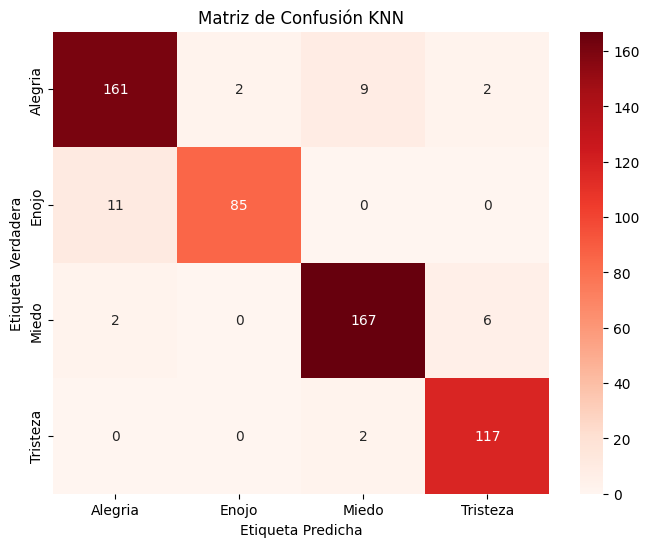

Reporte del modelo KNN


,Alegria,Enojo,Miedo,Tristeza,accuracy,macro avg,weighted avg
precision,0.925287,0.977011,0.938202,0.936000,0.939716,0.944125,0.940359
recall,0.925287,0.885417,0.954286,0.983193,0.939716,0.937046,0.939716
f1-score,0.925287,0.928962,0.946176,0.959016,0.939716,0.939860,0.939511
support,174.000000,96.000000,175.000000,119.000000,0.939716,564.000000,564.000000


In [37]:
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train_s, y_train_s)
y_pred = knn.predict(X_test_s)
labels = np.unique(y_test_s)
cm = confusion_matrix(y_test_s, y_pred, labels=labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=labels, yticklabels=labels)
plt.title("Matriz de Confusión KNN")
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Verdadera")
plt.show()
print("Reporte del modelo KNN")
df_report = pd.DataFrame.from_dict(classification_report(y_test_s, y_pred, output_dict=True))
df_report

Basado en el reporte de KNN, se puede concluir lo siguiente:

1)El modelo KNN muestra un rendimiento sólido en la clasificación de las emociones, con una precisión promedio de aproximadamente 0.94.

2)Se observa que el modelo logra capturar correctamente las instancias de la clase "Alegria" y "Enojo" con altos valores de precisión, recall y f1-score.

3)El modelo también tiene un buen rendimiento en la clasificación de las clases "Miedo" y "Tristeza", aunque con una precisión ligeramente menor.

4)La exactitud general del modelo es alta, con una tasa de acierto del 93.97%. Estos resultados indican que el modelo KNN es capaz de distinguir eficazmente entre las diferentes emociones analizadas.

En general, el modelo KNN es recomendado para la clasificación precisa de emociones en escenarios similares, respaldado por sus buenos resultados en términos de precisión, recall y f1-score.

### Neural Network
El parámetro alpha controla la regularización de la red neuronal. Al estudiar su efecto mediante una gráfica, encontramos el equilibrio entre ajuste y generalización del modelo. Esto mejora la precisión en clasificación. Es importante encontrar un equilibrio adecuado en la selección de alpha para evitar sobreajuste o subajuste del modelo en nuevos datos.

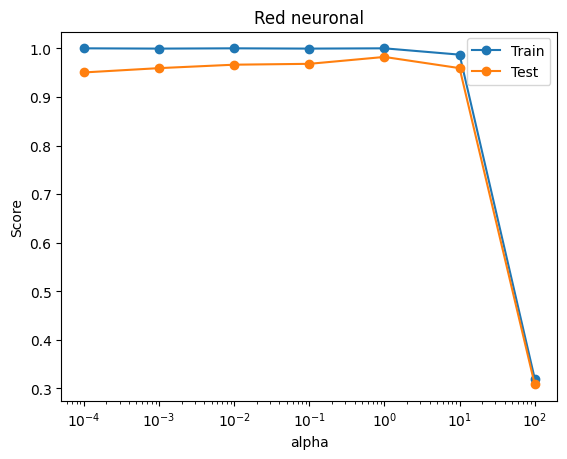

In [9]:
from sklearn.neural_network import MLPClassifier
alphas=[0.0001, 0.001,0.01, 0.1, 1, 10, 100]
score_train = []
score_test = []
for a in alphas:
    mlp=MLPClassifier(alpha=a,hidden_layer_sizes=(7,5),max_iter=500).fit(X_train_s, y_train_s)
    score_train.append(mlp.score(X_train_s, y_train_s))
    score_test.append(mlp.score(X_test_s, y_test_s))
plt.semilogx(alphas, score_train, label='Train', marker='o')
plt.semilogx(alphas, score_test, label='Test', marker='o')
plt.xlabel('alpha')
plt.ylabel('Score')
plt.title('Red neuronal')
plt.legend()
plt.show()

De la gráfica, se observa que el valor de alpha mantiene un rendimiento consistente tanto en los datos de entrenamiento como en los de prueba. Esto indica que el modelo se generaliza bien en nuevos datos. Basado en la proximidad entre los datos de entrenamiento y prueba, se seleccionará un valor de $\alpha=1$. Además, se puede observar que un valor de alpha igual a 100 resulta en un modelo con bajo rendimiento (underfitting).

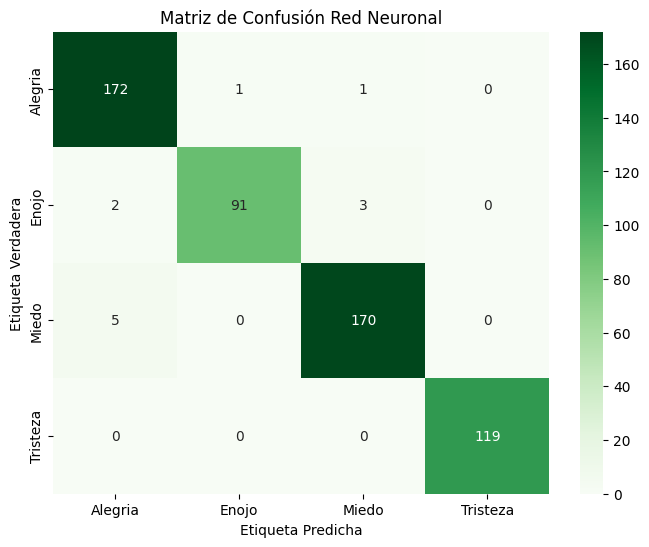

Reporte del modelo Red Neuronal


,Alegria,Enojo,Miedo,Tristeza,accuracy,macro avg,weighted avg
precision,0.960894,0.989130,0.977011,1.0,0.978723,0.981759,0.978952
recall,0.988506,0.947917,0.971429,1.0,0.978723,0.976963,0.978723
f1-score,0.974504,0.968085,0.974212,1.0,0.978723,0.979200,0.978700
support,174.000000,96.000000,175.000000,119.0,0.978723,564.000000,564.000000


In [39]:
mlp = MLPClassifier(alpha=1,hidden_layer_sizes=(7,5),max_iter=500).fit(X_train_s, y_train_s)
y_pred = mlp.predict(X_test_s)
labels = np.unique(y_test_s)
cm = confusion_matrix(y_test_s, y_pred, labels=labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=labels, yticklabels=labels)
plt.title("Matriz de Confusión Red Neuronal")
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Verdadera")
plt.show()
print("Reporte del modelo Red Neuronal")
df_report = pd.DataFrame.from_dict(classification_report(y_test_s, y_pred, output_dict=True))
df_report

Basado en el reporte del modelo de red neuronal, se puede concluir lo siguiente:

1)El modelo tiene una alta precisión en la clasificación de las emociones, con valores superiores al 96% para las clases de Alegria, Enojo, Miedo y Tristeza.

2)El recall y el f1-score del modelo son cercanos a 1.0, lo que indica que es capaz de recuperar y clasificar correctamente la mayoría de las instancias de las emociones en el conjunto de prueba.

En general, el modelo muestra un buen desempeño en la clasificación de las emociones, con un promedio ponderado de precisión, recall y f1-score alrededor del 97.8%. Estos resultados indican que el modelo de red neuronal es efectivo para la clasificación de emociones y puede ser utilizado de manera confiable en aplicaciones prácticas.

### Comparando los modelos.

La utilización de la validación cruzada con 5 folds para los modelos SVM, KNN y Red Neuronal nos permite obtener estimaciones más confiables del rendimiento de los modelos y evaluar su capacidad de generalización en datos no vistos. Esto nos ayuda a  seleccionar el modelo más adecuado para la detección de emociones a partir de la voz.

In [56]:
from sklearn.model_selection import cross_val_score
#Definimos los modelos
modelo1=SVC(kernel="rbf",gamma=0.001,decision_function_shape="ovr")
modelo2=KNeighborsClassifier(n_neighbors=5)
modelo3=MLPClassifier(alpha=1,hidden_layer_sizes=(7,5),max_iter=500)
#aplicamos 5-croos-validation
score_modelo1 = cross_val_score(modelo1, X_estandarizado, y, cv=5)
score_modelo2 = cross_val_score(modelo2, X_estandarizado, y, cv=5)
score_modelo3 = cross_val_score(modelo3, X_estandarizado, y, cv=5)
#Vemos el resultado de la validación cruzada
print("SVM con 5 folds: \n",score_modelo1,"\n","media ",np.mean(score_modelo1),", std:",np.std(score_modelo1),"\n")
print("KNN con 5 folds: \n",score_modelo2,"\n","media: ",np.mean(score_modelo2),", std: ",np.std(score_modelo2),"\n")
print("Red Neuronal con 5 fold: \n",score_modelo3,"\n","media: ",np.mean(score_modelo3),", std:",np.std(score_modelo3),"\n")

SVM con 5 folds: 
 [0.96895787 0.96008869 0.97782705 0.96895787 0.97111111] 
 media  0.9693885193397389 , std: 0.005675100820233523 

KNN con 5 folds: 
 [0.94235033 0.94900222 0.96008869 0.94013304 0.95333333] 
 media:  0.9489815225424982 , std:  0.007274287023508916 

Red Neuronal con 5 fold: 
 [0.96452328 0.97339246 0.97339246 0.96230599 0.97777778] 
 media:  0.9702783936930277 , std: 0.005870539720675585 



Basándome en los resultados del cross-validation con 5 folds, y considerando tanto el rendimiento promedio como la desviación estándar, recomendaría elegir el modelo de Red Neuronal para la detección de emociones a partir de la voz.

El modelo de Red Neuronal mostró una precisión media de aproximadamente 97% y una desviación estándar de 0.006, lo cual indica una consistencia y estabilidad en su rendimiento. Además, las redes neuronales tienen la capacidad de aprender representaciones complejas y capturar relaciones no lineales en los datos, lo que podría ser beneficioso para la detección de emociones.

Si bien el modelo de SVM también mostró un rendimiento sólido, el modelo de Red Neuronal ofrece la ventaja adicional de su capacidad para aprender características y patrones más complejos en los datos.

En conclusión, se recomienda utilizar el modelo de Red Neuronal para la detección de emociones a partir de la voz debido a su alto rendimiento y capacidad de aprendizaje de características complejas.